# 互评作业1: 数据探索性分析与数据预处理

## 1.实验环境
    语言： python
    依赖的包：pylab, matplotlib, scipy, numpy
 
## 2.数据说明
    dataset1：wine-reviews，来源https://www.kaggle.com/zynicide/wine-reviews
    包含两个csv文件：
       winemag-data-130k-v2.csv：包含14个属性（3个数值属性，11个标称属性），129970条数据记录；
       winemag-data_first150k.csv：包含11个属性（3个数值属性，8个标称属性），150930条数据记录
    dataset2：Consumer & Visitor Insights For Neighborhoods来源https://www.kaggle.com/safegraph/visit-patterns-by-census-block-group
    包含一个csv文件：
       cbg_patterns.csv：包含13个属性（6个数值属性，7个标称属性），220736条数据记录 

## 3.数据分析
### 3.1 数据摘要
    数据集1中winemag-data-130k-v2.csv数据包含：
    3个数值属性：Uname、points、 price；
    11个标称属性：country、description、designation、province、region_1、region_2、taster_name、taster_twitter_handle、title、variety、winery；
    winemag-data_first150k.csv数据包含：
    3个数值属性：Uname、points、 price；
    8个标称属性：country、description、designation、province、region_1、region_2、variety、winery；
    数据集2中cbg_patterns.csv数据包含：
    6个数值属性：census_block_group、date_range_start、date_range_end、raw_visit_count、raw_visitor_count、distance_from_home；
    6个标称属性：visitor_home_cbgs、visitor_work_cbgs、related_same_day_brand、related_same_month_brand、top_brands、popularity_by_hour、popularity_by_day。
    为了方便数据的读取和处理，使用pandas库对数据集进行读取和处理。判断属性的类型之后，使用pandas库中封装的函数获得标称属性的取值频数和数值属性的最大值、最小值、中位数、均值、四分位数及缺失值的个数，程序及结果如下所示：

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
pd.set_option('display.float_format', lambda x: '%.1f' % x,'max_colwidth',100)

dataload1 = pd.read_csv('winemag-data-130k-v2.csv')#读取表1中的数据
dic1 = {'attribute':[], 'max':[], 'min':[], 'mean':[], 'median':[], 'quantile':[], 'num_NA':[]}#属性，最大值、最小值、中位数、均值、四分位数及缺失值的个数
count1 = []#频数
for key in dataload1.keys():
    d = dataload1[key]
    if np.issubdtype(d.dtypes,np.number):#判断属性类型
        l = [key,d.max(),d.min(),d.mean(),d.median(),(d.quantile(0.25),d.quantile(0.5),d.quantile(0.75)),sum(d.isnull())]#统计数值属性的最大、最小、均值、中位数、四分位数及缺失值的个数
        for k,i in zip(dic1.keys(),l):
            dic1[k].append(i)
    else:
        count1.append(d.value_counts())#统计标称属性取值的频数

dataload2 = pd.read_csv('winemag-data_first150k.csv')#读取表2中的数据
dic2 = {'attribute':[], 'max':[], 'min':[], 'mean':[], 'median':[], 'quantile':[], 'miss_NA':[]}
count2 = []
for key in dataload2.keys():
    d = dataload2[key]
    if np.issubdtype(d.dtypes,np.number):
        l = [key,d.max(),d.min(),d.mean(),d.median(),(d.quantile(0.25),d.quantile(0.5),d.quantile(0.75)),sum(d.isnull())]#统计数值属性的最大、最小、均值、中位数、四分位数及缺失值的个数
        for k,i in zip(dic2.keys(),l):
            dic2[k].append(i)
    else:
        count2.append(d.value_counts())#统计标称属性取值的频数
        
dataload3 = pd.read_csv('cbg_patterns.csv')#读取数据集2中的数据
dataload3 = dataload3.drop(['date_range_start','date_range_end','visitor_work_cbgs','visitor_home_cbgs'],axis=1)
dic3 = {'attribute':[], 'max':[], 'min':[], 'mean':[], 'median':[], 'quantile':[], 'miss_NA':[]}
count3 = []
for key in dataload3.keys():
    d = dataload3[key]
    if np.issubdtype(d.dtypes,np.number):
        l = [key,d.max(),d.min(),d.mean(),d.median(),(d.quantile(0.25),d.quantile(0.5),d.quantile(0.75)),sum(d.isnull())]#统计数值属性的最大、最小、均值、中位数、四分位数及缺失值的个数
        for k,i in zip(dic3.keys(),l):
            dic3[k].append(i)
    else:
        count3.append(d.value_counts())#统计标称属性取值的频数

数据集1中winemag-data-130k-v2.csv数值属性的最大值、最小值、中位数、均值、四分位数及缺失值的个数如下表所示：

In [6]:
pd.DataFrame(dic1)

,attribute,max,mean,median,min,num_NA,quantile
0,Unnamed: 0,129970.0,64985.0,64985.0,0.0,0,"(32492.5, 64985.0, 97477.5)"
1,points,100.0,88.4,88.0,80.0,0,"(86.0, 88.0, 91.0)"
2,price,3300.0,35.4,25.0,4.0,8996,"(17.0, 25.0, 42.0)"


数据集1中winemag-data_first150k数值属性的最大值、最小值、中位数、均值、四分位数及缺失值的个数如下表所示：

In [32]:
pd.DataFrame(dic2)

,attribute,max,mean,median,min,missvalue,quantile
0,Unnamed: 0,150929.0,75464.5,75464.5,0.0,0,"(37732.25, 75464.5, 113196.75)"
1,points,100.0,87.9,88.0,80.0,0,"(86.0, 88.0, 90.0)"
2,price,2300.0,33.1,24.0,4.0,13695,"(16.0, 24.0, 40.0)"


数据集2cbg_patterns.csv中数值属性的最大值、最小值、中位数、均值、四分位数及缺失值的个数如下表所示：

In [9]:
pd.DataFrame(dic3)

,attribute,max,mean,median,min,miss_NA,quantile
0,census_block_group,780309900000.0,287086382055.2,290190012013.5,10010201001.0,1,"(131210116244.25, 290190012013.5, 420034897521.75)"
1,raw_visit_count,7179900.0,47930.7,30640.0,60.0,106,"(17042.0, 30640.0, 56678.0)"
2,raw_visitor_count,6113949.0,11820.3,6541.0,50.0,106,"(3430.0, 6541.0, 13099.0)"
3,distance_from_home,6297845.0,35112.8,14614.0,706.0,217,"(8584.0, 14614.0, 31397.75)"


---
数据集1中winemag-data-130k-v2标称属性的取值频数。例如，对于country属性来说，出现频率最高的是US（54504次），其次是France（22903次）、Italy（19540次）。程序及运行结果如下：

In [10]:
count1

[US                        54504
 France                    22093
 Italy                     19540
 Spain                      6645
 Portugal                   5691
 Chile                      4472
 Argentina                  3800
 Austria                    3345
 Australia                  2329
 Germany                    2165
 New Zealand                1419
 South Africa               1401
 Israel                      505
 Greece                      466
 Canada                      257
 Hungary                     146
 Bulgaria                    141
 Romania                     120
 Uruguay                     109
 Turkey                       90
 Slovenia                     87
 Georgia                      86
 England                      74
 Croatia                      73
 Mexico                       70
 Moldova                      59
 Brazil                       52
 Lebanon                      35
 Morocco                      28
 Peru                         16
 Ukraine  

数据集1中winemag-data_first150k标称属性的取值频数。例如，对于country属性来说，出现频率最高的是US（62397次），其次是France（23478次）、Italy（21098次）。程序及运行结果如下：

In [33]:
count2

[US                        62397
 Italy                     23478
 France                    21098
 Spain                      8268
 Chile                      5816
 Argentina                  5631
 Portugal                   5322
 Australia                  4957
 New Zealand                3320
 Austria                    3057
 Germany                    2452
 South Africa               2258
 Greece                      884
 Israel                      630
 Hungary                     231
 Canada                      196
 Romania                     139
 Slovenia                     94
 Uruguay                      92
 Croatia                      89
 Bulgaria                     77
 Moldova                      71
 Mexico                       63
 Turkey                       52
 Georgia                      43
 Lebanon                      37
 Cyprus                       31
 Brazil                       25
 Macedonia                    16
 Serbia                       14
 Morocco  

数据集2标称属性的取值频数。程序及运行结果如下：

In [10]:
count3

[[]                                                                                                                                                                                  35542
 ["Dunkin' Donuts"]                                                                                                                                                                   7010
 ["starbucks"]                                                                                                                                                                        4178
 ["walmart"]                                                                                                                                                                          3054
 ["mcdonalds"]                                                                                                                                                                        2911
 ["Wawa"]                                                        

### 3.2 数据可视化
     对于两个数据集的全部数值属性，使用matplotlib库进行可视化，绘制直方图、qq图及盒图，检查数据分布及离群点，程序及结果如下所示：

D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


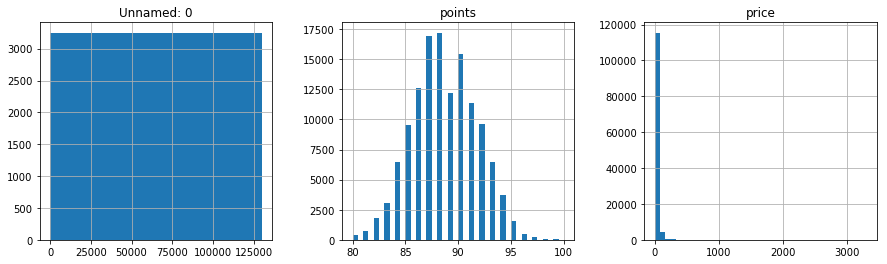

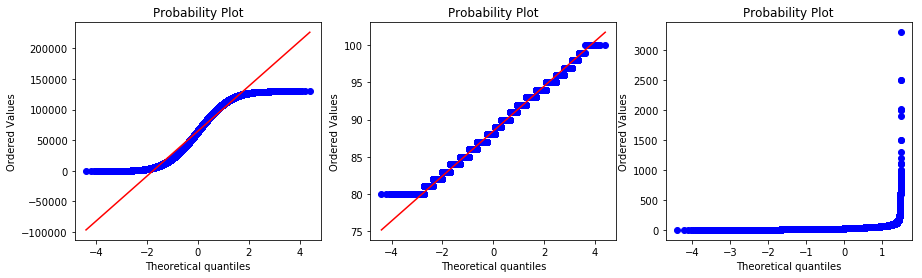

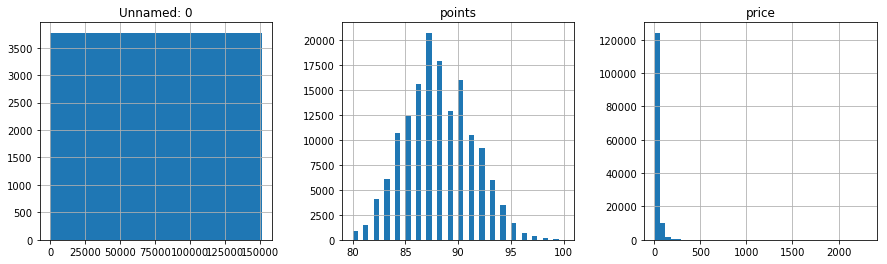

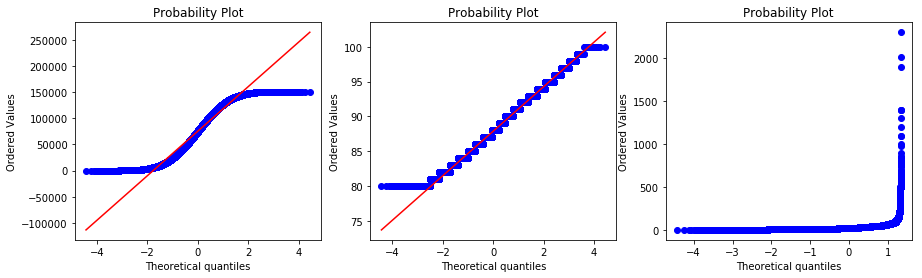

In [3]:
dataload1.hist(layout=(1,3),bins=40,figsize=(15,4))
l = ['Unnamed: 0','points','price']
plt.figure(figsize=(15, 4))
for i in range(len(l)):
    plt.subplot(130+i+1)
    stats.probplot(dataload1[l[i]],plot=plt)
plt.show()
dataload2.hist(layout=(1,3),bins=40,figsize=(15,4))
plt.figure(figsize=(15, 4))
for i in range(len(l)):
    plt.subplot(130+i+1)
    stats.probplot(dataload2[l[i]],plot=plt)
plt.show()

    根据数据集1中数值属性绘制直方图及qq图，从图中可以看出：属性points基本满足正态分布，另外两个属性Unnamed:0和price不满足正态分布。

D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


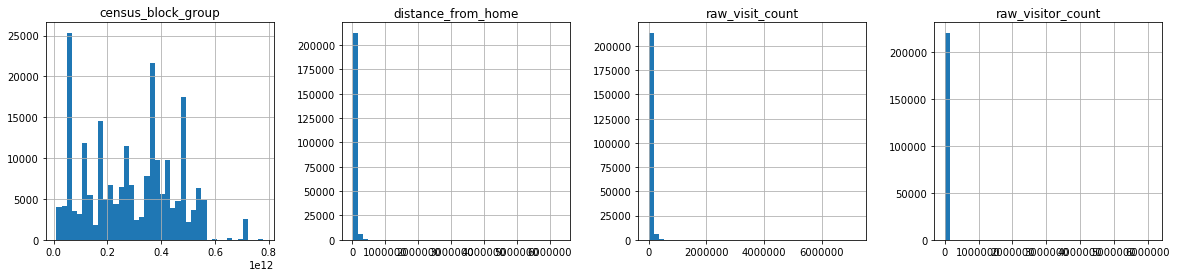

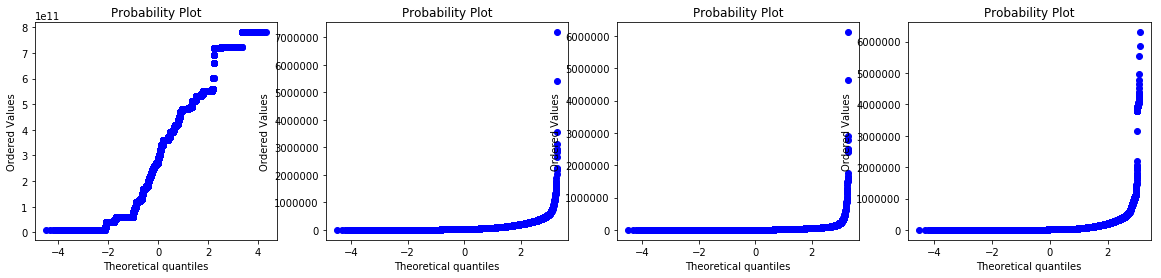

In [21]:
dataload3.hist(layout=(1,4),bins=40,figsize=(20,4))
l = ['census_block_group','raw_visit_count','raw_visitor_count','distance_from_home']
plt.figure(figsize=(20, 4))
for i in range(len(l)):
    plt.subplot(140+i+1)
    stats.probplot(dataload3[l[i]],plot=plt)
plt.show()

    根据数据集2中数值属性绘制直方图及qq图，从图中可以看出：4个属性都不满足正态分布。

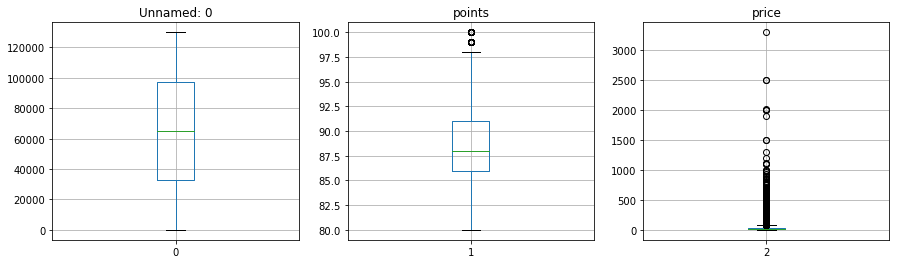

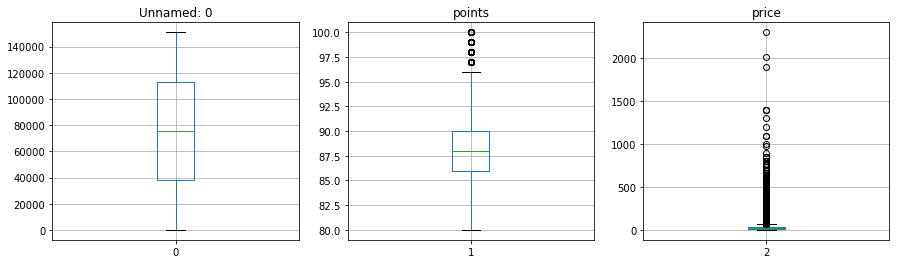

In [60]:
l = ['Unnamed: 0','points','price']
plt.figure(figsize=(15, 4))
for i in range(len(l)):
    plt.subplot(130+i+1)
    dataload1.boxplot(column=i)
    plt.title(l[i])
plt.show()
plt.figure(figsize=(15, 4))
for i in range(len(l)):
    plt.subplot(130+i+1)
    dataload2.boxplot(column=i)
    plt.title(l[i])
plt.show()

    根据数据集1绘制的盒图可以看出，属性Unnamed:0不存在离散点，属性points存在少数离散点，属性price存在较多离散点。

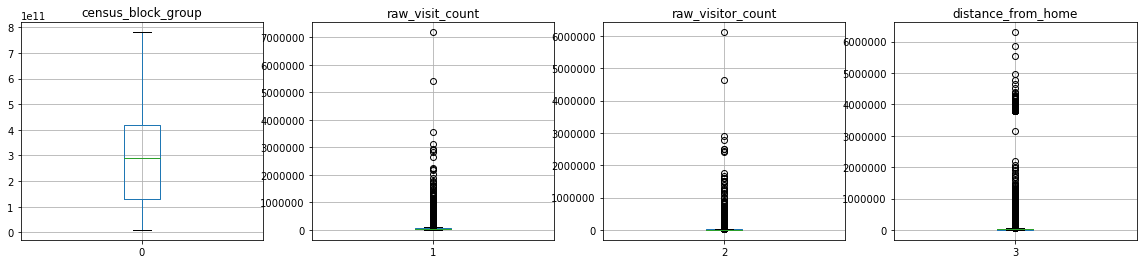

In [22]:
l = ['census_block_group','raw_visit_count','raw_visitor_count','distance_from_home']
plt.figure(figsize=(20, 4))
for i in range(len(l)):
    plt.subplot(140+i+1)
    dataload3.boxplot(column=i)
    plt.title(l[i])
plt.show()

    根据数据集2绘制的盒图可以看出，属性census_block_group不存在离散点，其余属性存在较多离散点。

## 4. 数据缺失处理
    数据收集可能因为人为原因或者其他因素导致数据有缺失现象，这时候需要对数据进行缺失处理，分别使用下列四种策略对缺失值进行处理:
        * 将缺失部分剔除
        * 用最高频率值来填补缺失值
        * 通过属性的相关关系来填补缺失值
        * 通过数据对象之间的相似性来填补缺失值
    借助 python 下 impyute 包进行数据缺失值填补，impyute 不仅高效实现了利用一些基本数值（均值、众数、中位数）进行数据填补的方法，还可以基于属性相关关系进行数据填补，以及基于 KNN 进行数据对象相似度聚类计算进行数据填补的函数，可以方便快速地辅助数据缺失值填补。
    得到处理后的数据与原数据进行可视化对比，程序及结果如下所示：

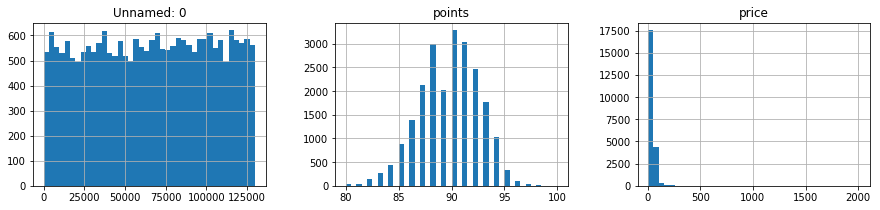

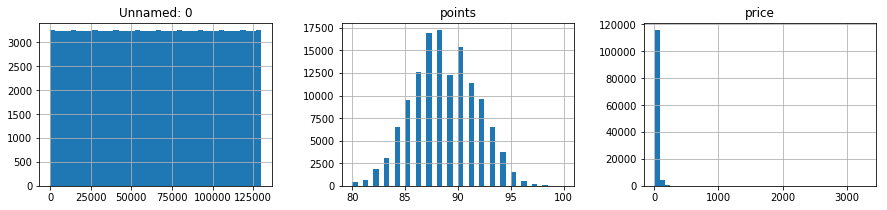

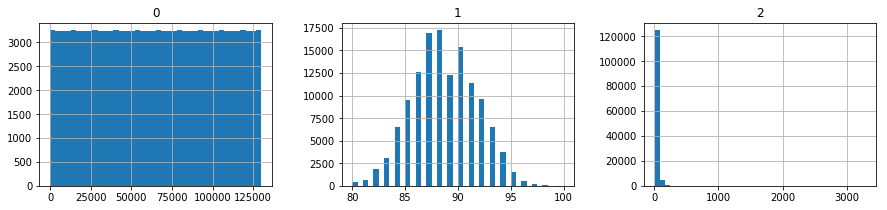

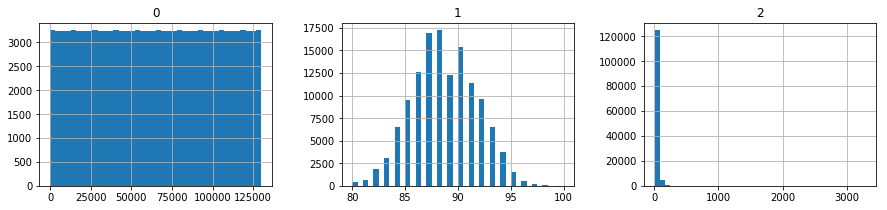

In [6]:
import impyute as impy
data_drop = dataload1.dropna()#将缺失值剔除
data_drop.hist(layout=(1,3),bins=40,figsize=(15,3))

data_mode = dataload1.fillna(dataload1.mode())#用最高频率纸填补缺失值
data_mode.hist(layout=(1,3),bins=40,figsize=(15,3))

data = dataload1[['Unnamed: 0','points','price']]
nd = np.array(data)
filled_mice = impy.mice(nd)#通过属性的相关关系来填补缺失值
data_mice = pd.DataFrame(filled_mice)
data_mice.hist(layout=(1,3),bins=40,figsize=(15,3))

filled_knn = impy.fast_knn(nd,k=3)#通过数据对象之间的相似性来填补缺失值
data_knn = pd.DataFrame(filled_knn)
data_knn.hist(layout=(1,3),bins=40,figsize=(15,3))

plt.show()

    对数据集1进行缺失值处理得到以上直方图，从图中可以看出：当缺失值数占可用数据比例较大时，删除缺失值会对原始数据分布造成较大影响，其他方法对数据影响程度较小，可以保持原始的数据分布情况。

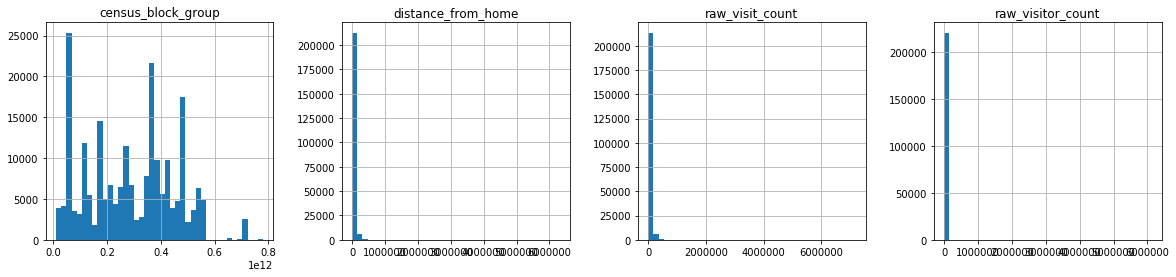

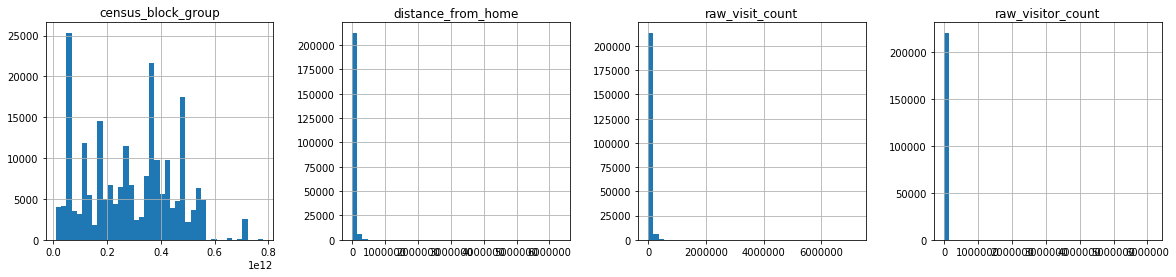

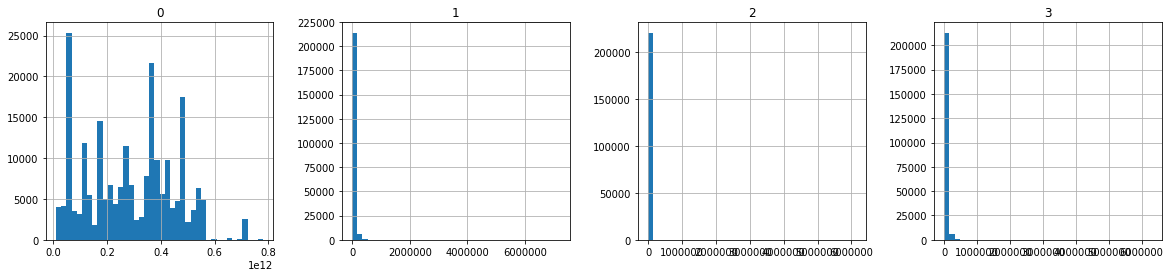

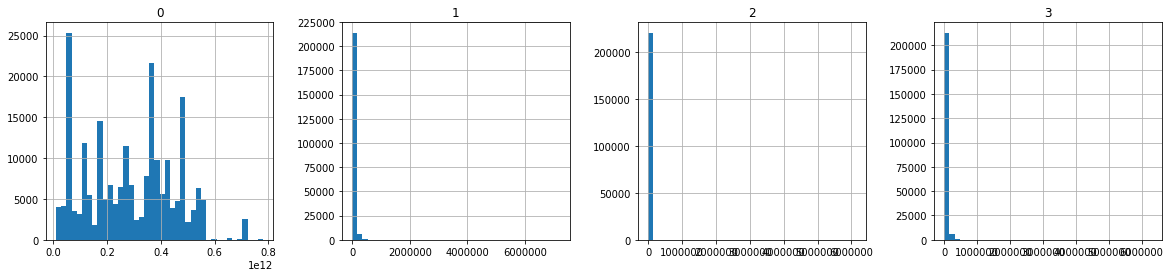

In [9]:
import impyute as impy
data_drop = dataload3.dropna()#将缺失值剔除
data_drop.hist(layout=(1,4),bins=40,figsize=(20,4))

data_mode = dataload3.fillna(dataload3.mode())#用最高频率纸填补缺失值
data_mode.hist(layout=(1,4),bins=40,figsize=(20,4))

data = dataload3[['census_block_group','raw_visit_count','raw_visitor_count','distance_from_home']]
nd = np.array(data)
filled_mice = impy.mice(nd)#通过属性的相关关系来填补缺失值
data_mice = pd.DataFrame(filled_mice)
data_mice.hist(layout=(1,4),bins=40,figsize=(20,4))

filled_knn = impy.fast_knn(nd,k=3)#通过数据对象之间的相似性来填补缺失值
data_knn = pd.DataFrame(filled_knn)
data_knn.hist(layout=(1,4),bins=40,figsize=(20,4))

plt.show()

    对数据集2进行缺失值处理得到以上直方图，从图中可以看出：删除缺失值会对原始数据分布造成较大影响，其他方法对数据影响程度较小，可以保持原始的数据分布情况。
    总结4种处理缺失值方法的适用情况：
    * 将缺失部分剔除：适用于缺失值数据占可用数据比例较少的情况，否则删除缺失值会对原始数据分布造成较大影响
    * 用最高频率值来填补缺失值：填补缺失值最简便和快捷的方法就是使用一些代表中心趋势的值。而代表中心趋势的值反映了变量分布的最常见值，因此中心区是指是最自然的选择。有多个代表数据中心趋势的指标：平均值、中位数、众数等。对于正态分布来说，所有的观测值都较好的聚集在平均值周围，平均值就是最好的选择。然而，对于偏态分布，或者说有离群值的变量来说，选择平均值就不好。偏态分布的大部分数值都聚集在变量分布的一侧，因此不能选择平均值。另一方面，离群值（极值）的存在会扭曲平均值（比如：1、2、3、30的平均值是 9）。对于偏态分布或者有离群值的分布而言，中位数是更好的代表数据中心趋势的指标。所以最后还得看数据的分布来选择一些代表中心趋势的值。
    * 通过属性的相关关系来填补缺失值： 如果某两变量之间具有明显的一定的相关关系，那么我们可以根据另一个未确实的值来预测所缺失的那一个值。
    * 通过数据对象之间的相似性来填补缺失值：根据KNN算法找到任何案例最近的k个邻居，在K在最近邻案例中通过设定函数值（一般会选取均值、中位数、众数等）来填充缺失值
     
    

